## Naive Bayes for Text Classification
A demonstration of the effectivness of Naive Bayes for text classification on the datasets available at:   
http://derekgreene.com/bbc/ 

In [1]:
import numpy as np
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
def gather_docs(r_dir):
    doc_dirs = os.listdir(r_dir)[1:]
    docs = []
    labels = []
    for d in doc_dirs:
        print(r_dir + '/' + d)
        for f in os.listdir(r_dir + '/' + d)[1:]:
            labels.append(d)
            txt = Path(r_dir + '/' + d + '/' + f).read_text()
            txt = txt.replace('\n', ' ')
            docs.append(txt)
    return docs, labels, doc_dirs


def test_and_cm(docs, labels, cats, norm=False):
    if norm:
        norm_cm = 'true'
        format_str = '.2f'
    else:
        norm_cm = None
        format_str = 'd'

    X_train, X_test, y_train, y_test = train_test_split(docs, labels, test_size=1 / 3, random_state=3)
    model = make_pipeline(TfidfVectorizer(), MultinomialNB(fit_prior=False))
    # Train the model using the training data
    model.fit(X_train, y_train)
    # Predict the categories of the test data
    y_pred = model.predict(X_test)
    print("The accuracy is {:2.2}".format(accuracy_score(y_test, y_pred)))
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                                   normalize=norm_cm, ax=ax, values_format=format_str,
                                                   xticks_rotation='vertical', labels=cats)

### BBC 5 class dataset
Documents stored in sub directories below `bbc`.

In [3]:
 b_docs, b_labels, cats = gather_docs('bbc')

In [4]:
len(b_labels), len(b_docs)

(0, 0)

In [5]:
test_and_cm(b_docs, b_labels, cats, norm=True)

ValueError: With n_samples=0, test_size=0.3333333333333333 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

### BBC Sport 5 class dataset
Documents stored in sub directories below `bbcsport`.

In [6]:
bs_docs, bs_labels, bs_cats = gather_docs('bbcsport')

bbcsport/football
bbcsport/cricket
bbcsport/athletics
bbcsport/rugby
bbcsport/tennis


In [7]:
np.unique(bs_labels, return_counts=True)

(array(['athletics', 'cricket', 'football', 'rugby', 'tennis'], dtype='<U9'),
 array([100, 123, 264, 146,  99]))

The accuracy is 0.83


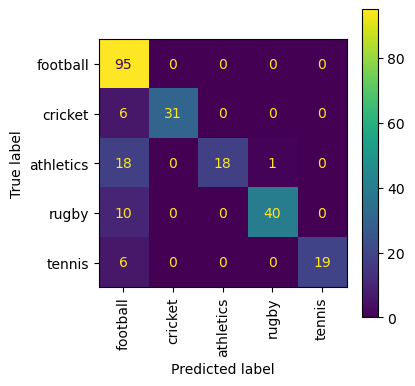

In [8]:
test_and_cm(bs_docs, bs_labels, bs_cats, norm=False)

The accuracy is 0.83


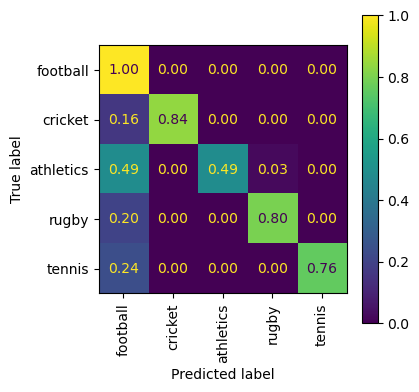

In [9]:
test_and_cm(bs_docs, bs_labels, bs_cats, norm=True)

In [10]:
bs_docs[7]

'Juninho demand for O\'Neill talks  Juninho\'s agent has confirmed that the player is hoping for talks with Martin O\'Neill as the Brazilian midfielder comes closer to departing Celtic.  Brian Hassell says no official approach has been received from Manchester City but that the English club had been earmarked as a possible destination. But it was being stressed to BBC Sport that Juninho would prefer to remain with the Scottish champions. Juninho wants assurances that he will return to O\'Neill\'s first-team plans. He has become frustrated with his lack of first-team action since his move from Middlesbrough in the summer. Hassel says Juninho, who has just bought a new home, would "desperately like to stay at Celtic" but will seek a move if it is made clear that he is not wanted.  The agent also stressed that nothing should be read into the 30-year-old\'s father being in Scotland and talk of a move back to Botafogo in Brazil. Juninho\'s father was simply in the country to see his son and